In [1]:
import torch
import torchvision
import os
import getpass
if getpass.getuser() == 'vscode':       # Running in container
    os.chdir('/workspaces/kornia/')
else:                                   # Running in virtual environment
    os.chdir(os.path.join(os.path.expanduser('~'), 'Documents/Git/kornia/'))
print(os.getcwd())
import sys
sys.path.append(os.getcwd())
cwd_path = os.getcwd()

/home/yhollander/Documents/Git/kornia


In [2]:
os.chdir(os.path.join(os.path.expanduser('~'), 'Documents/Git/kornia/test'))
from geometry.nerf.test_rays import create_one_camera

os.chdir(cwd_path)

In [3]:
from kornia.geometry.nerf.nerf_solver import NerfSolver
from torchvision.io import read_image
import matplotlib.pyplot as plt

torch.Size([756, 1008, 3])

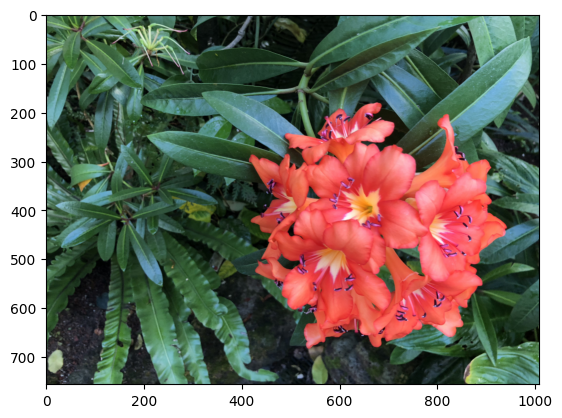

In [8]:
img_paths = ['kornia/geometry/nerf/kornia_nerf_data/flower_4/images/image001.png']

transform = torchvision.transforms.Resize((250))
imgs: torch.tensor = []
for img_path in img_paths:
    img = read_image(img_path)
    # img = transform(img)
    imgs.append(img)

img_plt = torch.permute(imgs[0], (1, 2, 0))
plt.imshow(img_plt)
img_plt.shape

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cameras = create_one_camera(imgs[0].shape[1], imgs[0].shape[2], device)

nerf_obj = NerfSolver(device=device)
num_img_rays = 1024
nerf_obj.init_training(cameras=cameras, min_depth=0., max_depth=3., imgs=imgs, num_img_rays=num_img_rays, 
                       batch_size=num_img_rays, num_ray_points=51)

nerf_obj.run(num_epochs=1000)

cuda
Epoch: 0: epoch_loss = 0.1188059076666832
Epoch: 10: epoch_loss = 0.05192409083247185
Epoch: 20: epoch_loss = 0.04972189664840698
Epoch: 30: epoch_loss = 0.045259639620780945
Epoch: 40: epoch_loss = 0.04370693489909172
Epoch: 50: epoch_loss = 0.04092217609286308
Epoch: 60: epoch_loss = 0.0370870977640152
Epoch: 70: epoch_loss = 0.033320773392915726
Epoch: 80: epoch_loss = 0.03063887171447277
Epoch: 90: epoch_loss = 0.026578575372695923
Epoch: 100: epoch_loss = 0.0252666175365448
Epoch: 110: epoch_loss = 0.025838077068328857
Epoch: 120: epoch_loss = 0.025525283068418503
Epoch: 130: epoch_loss = 0.02339925430715084
Epoch: 140: epoch_loss = 0.023138176649808884
Epoch: 150: epoch_loss = 0.023008547723293304
Epoch: 160: epoch_loss = 0.020140504464507103
Epoch: 170: epoch_loss = 0.020251065492630005
Epoch: 180: epoch_loss = 0.02159024402499199
Epoch: 190: epoch_loss = 0.018609628081321716
Epoch: 200: epoch_loss = 0.018771234899759293
Epoch: 210: epoch_loss = 0.017720719799399376
Epoch: 

In [10]:
img_rendered = nerf_obj.render_views(cameras)[0]
img_rendered_plt = torch.permute(img_rendered, (1, 2, 0))

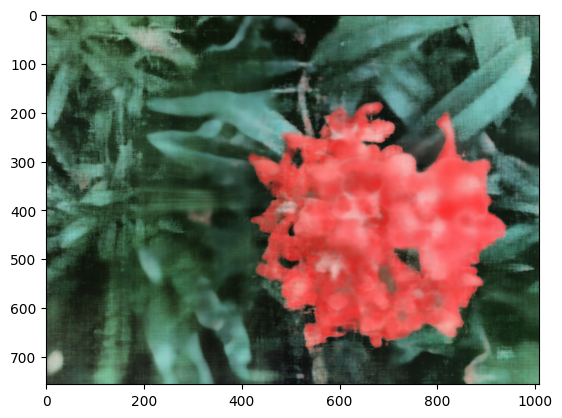

In [11]:
plt.imshow(img_rendered_plt)